In [1]:
import numpy as np
import pandas as pd
import sklearn
import sklearn.model_selection
import sklearn.svm
import matplotlib.pyplot as plt
import tqdm
import itertools
import umap
from Problem11Pipleline import *

c:\Users\Lawrence\miniconda3\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df=pd.read_csv('Project1-Classification.csv')
df.head()

,full_text,summary,keywords,publish_date,authors,url,leaf_label,root_label
0,"'Pure Hockey, the largest hockey retailer in t...","'Pure Hockey, the largest hockey retailer in t...","['acquire', 'agrees', 'nevada', 'retail', 'hoc...",2022-10-21 17:11:22+00:00,['Ein News'],https://www.einnews.com/pr_news/597148062/pure...,hockey,sports
1,'HKO Hockey Canada Sponsorship 20221006\n\nHoc...,'The tally of Hockey Canada’s sponsorship loss...,"['sexual', 'exclusive', 'settlement', 'million...",NaN,['Barbara Shecter'],https://ca.finance.yahoo.com/news/exclusive-ho...,hockey,sports
2,'Canadian Prime Minister Justin Trudeau said W...,'Canadian Prime Minister Justin Trudeau said W...,"['québec', 'surprise', 'trust', 'sexual', 'org...",2022-10-05 00:00:00,['The Athletic Staff'],https://theathletic.com/3659888/2022/10/05/hoc...,hockey,sports
3,'Hockey Canada paid a crisis communications fi...,'Nicholson says that Hockey Canada did not go ...,"['sexual', 'organization', 'million', 'ceo', '...",2022-11-15 00:00:00,['Dan Robson'],https://theathletic.com/3900630/2022/11/15/hoc...,hockey,sports
4,'The Denver Broncos are looking for a new head...,'The Denver Broncos are looking for a new head...,"['beats', 'force', 'season', 'teams', 'anchora...",NaN,"['Parker Seibold', 'The Gazette', 'Gazette File']",https://gazette.com/multimedia/photo-air-force...,hockey,sports


In [3]:
_,_,weights,embeddings=pipeline(df,normalize="mean")
embeddings=combined_embeddings(embeddings,weights)

Embeddings dict created
Embeddings created
Finding optimal weights
Optimal weights found: [-0.560546875, -0.904296875, -0.677734375]
val score: 0.9619047619047618
test score: 0.9682539682539683


In [7]:
reducer = umap.UMAP()
reduced_embeddings = reducer.fit_transform(embeddings)

In [37]:
random_embedings=np.random.rand(embeddings.shape[0],embeddings.shape[1])
#reduce the random embeddings
reduced_random_embeddings = reducer.fit_transform(random_embedings)


## Plot of the Emebddings vs the random Emebddings

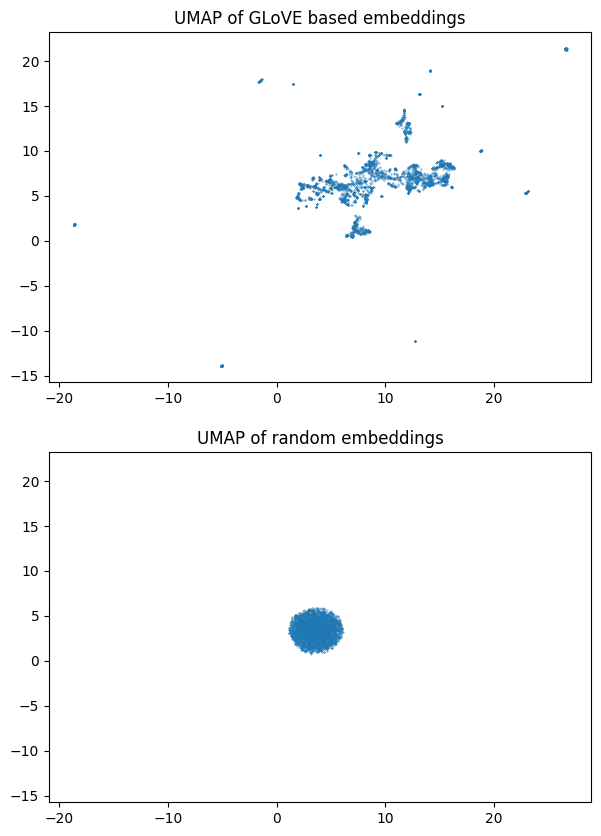

In [47]:
fig,axs=plt.subplots(2,1,figsize=(7,10))
axs[0].scatter(reduced_embeddings[:,0],reduced_embeddings[:,1],s=0.1)
axs[0].set_title("UMAP of GLoVE based embeddings")

axs[1].scatter(reduced_random_embeddings[:,0],reduced_random_embeddings[:,1],s=0.1)
axs[1].set_title("UMAP of random embeddings")

#set the xlim and ylim of the random embeddings to be the same as the glove embeddings
axs[1].set_xlim(axs[0].get_xlim())
axs[1].set_ylim(axs[0].get_ylim())

plt.savefig("UMAP_unlabeled.png")


## Plot of the Emebddings vs the random Emebddings with labels

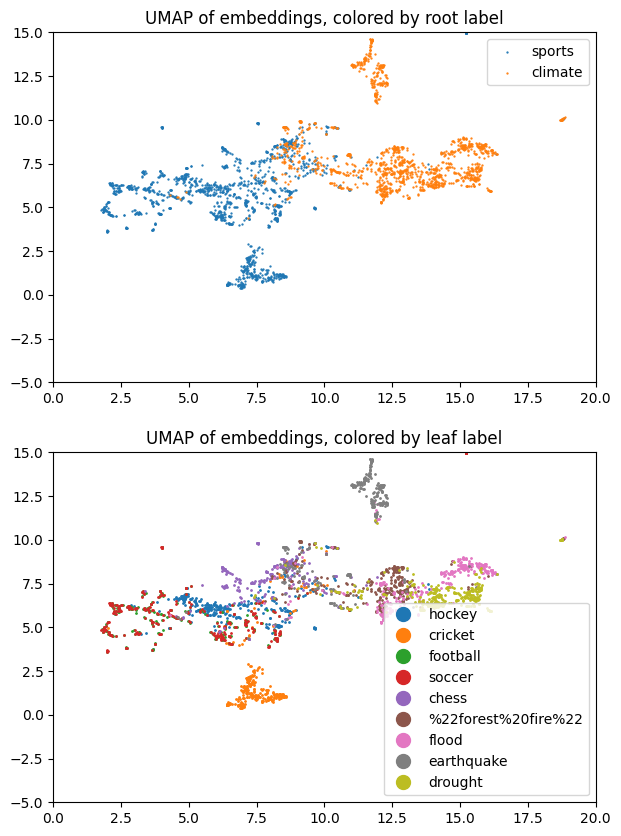

In [46]:
fig,axs=plt.subplots(2,1,figsize=(7,10))
plt.sca(axs[0])
for label in df.root_label.unique():
    plt.scatter(reduced_embeddings[df.root_label==label,0],reduced_embeddings[df.root_label==label,1],label=label,s=0.4)
plt.title("UMAP of embeddings, colored by root label")
plt.legend()

plt.xlim(0,20)
plt.ylim(-5,15)


plt.sca(axs[1])
for val in df.leaf_label.unique():
    # plt.scatter(reduced_embeddings[df.leaf_label==val,0],reduced_embeddings[df.leaf_label==val,1],label=val,s=0.4)
    plt.plot(reduced_embeddings[df.leaf_label==val,0],reduced_embeddings[df.leaf_label==val,1],"o",label=val,markersize=np.sqrt(1.),alpha=1)
plt.title("UMAP of embeddings, colored by leaf label")
lgnd = plt.legend(loc="lower right", numpoints=1, fontsize=10,markerscale=10)

plt.xlim(0,20)
plt.ylim(-5,15)

plt.savefig("UMAP_labeled.png")